In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

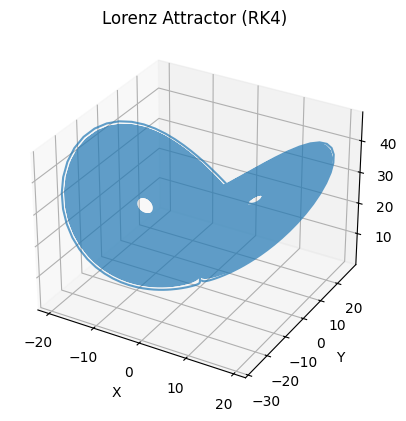

In [2]:
# Lorenz system parameters
sigma = 10
rho = 28
beta = 8/3

# Lorenz equations
def lorenz(x, y, z, sigma=sigma, rho=rho, beta=beta):
    x_dot = sigma * (y - x)
    y_dot = x * (rho - z) - y
    z_dot = x * y - beta * z
    return x_dot, y_dot, z_dot

# Runge-Kutta 4th order method
def rk4_step(x, y, z, dt):
    k1_x, k1_y, k1_z = lorenz(x, y, z)
    k2_x, k2_y, k2_z = lorenz(x + 0.5 * dt * k1_x, y + 0.5 * dt * k1_y, z + 0.5 * dt * k1_z)
    k3_x, k3_y, k3_z = lorenz(x + 0.5 * dt * k2_x, y + 0.5 * dt * k2_y, z + 0.5 * dt * k2_z)
    k4_x, k4_y, k4_z = lorenz(x + dt * k3_x, y + dt * k3_y, z + dt * k3_z)
    x_new = x + (dt / 6.0) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    y_new = y + (dt / 6.0) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y)
    z_new = z + (dt / 6.0) * (k1_z + 2 * k2_z + 2 * k3_z + k4_z)
    return x_new, y_new, z_new

# Time step
dt = 0.01
num_steps = 1000000

# Initial conditions
x = np.zeros(num_steps + 1)
y = np.zeros(num_steps + 1)
z = np.zeros(num_steps + 1)

# Set initial values
x[0], y[0], z[0] = (0., 1., 1.05)

# Solve the differential equations using RK4 method
for i in range(num_steps):
    x[i + 1], y[i + 1], z[i + 1] = rk4_step(x[i], y[i], z[i], dt)
    

# Plot the Lorenz attractor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (RK4)')

plt.show()

x_intercept = []
y_intercept = []
plane_height = 14


for i in range(len(z)):
    if z[i] < plane_height and z[i+1] > plane_height:
        x_intercept.append((x[i]))
        y_intercept.append((y[i]))
    else:
        pass

In [3]:
def find_intercepts(x, y, z, plane_height):
    """
    Find the intercepts of a 3D trajectory with a given plane.

    Parameters:
    - x, y, z: Arrays of x, y, and z coordinates of the trajectory.
    - plane_height: Height of the plane.

    Returns:
    - x_intercept, y_intercept: Arrays of x and y coordinates of the intercepts.
    """
    x_intercept = []
    y_intercept = []
    for i in range(len(z) - 1):
        if z[i] < plane_height and z[i+1] > plane_height:
            x_intercept.append(x[i])
            y_intercept.append(y[i])
    return x_intercept, y_intercept

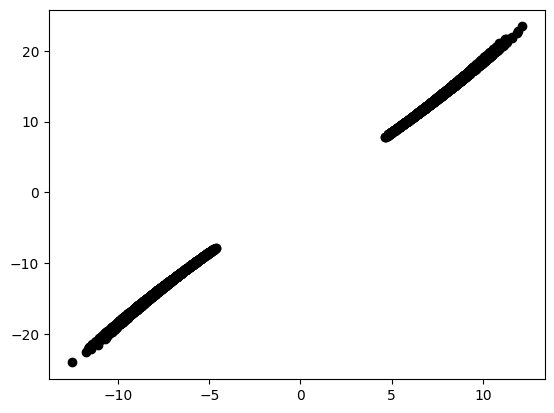

In [4]:
plt.plot(x_intercept, y_intercept, marker = 'o', linestyle = '', color = 'black')
plt.show()

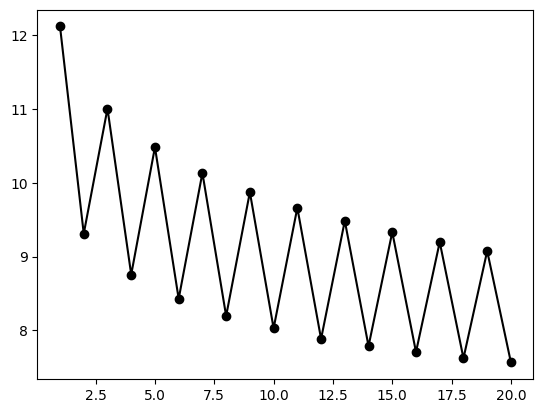

In [5]:
def smk(x, y, m, k):
    """
    Generate a set of points from a 2D trajectory using a sliding window.

    Parameters:
    - x, y: Arrays of x and y coordinates of the trajectory.
    - m: Size of the sliding window.
    - k: Step size of the sliding window.

    Returns:
    - s: List of points generated by the sliding window.
    """
    N = len(x)
    s = []
    for i in range(int(np.floor((N - m) / k))):
        point = [x[m+(i*k) -1 ], y[m+(i*k) -1 ]]
        s.append(point)
    return s

def lmk(x, y, m, k):
    """
    Calculate the length of a 2D trajectory using a sliding window.

    Parameters:
    - x, y: Arrays of x and y coordinates of the trajectory.
    - m: Size of the sliding window.
    - k: Step size of the sliding window.

    Returns:
    - Lmk: Length of the trajectory using the sliding window method.
    """
    N = len(x)
    points = smk(x, y, m, k)

    total_distance = 0
    for i in range(len(points) - 1):
        distance = np.linalg.norm(np.array(points[i + 1]) - np.array(points[i]))
        total_distance += distance
    Lmk = (total_distance * (N - m)) / (k * (int(np.floor(N - m) / k)))
    return Lmk

def lk(x, y, k):
    """
    Calculate the length of a 2D trajectory using the Lk method.

    Parameters:
    - x, y: Arrays of x and y coordinates of the trajectory.
    - k: Number of sliding windows to use.

    Returns:
    - Lk: Length of the trajectory using the Lk method.
    """
    moyenne = 0
    for m in range(1, k +1):
        moyenne += lmk(x, y, m, k)
    Lk = moyenne / k
    return Lk

#print(lmk(x_intercept, y_intercept, 1, 1))
#print(lmk(x_intercept, y_intercept, 1, 2))
#print(lmk(x_intercept, y_intercept, 2, 2))
#print(lk(x_intercept, y_intercept, 2))


K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 , 20]
l_de_k = []
for k in range(1, len(K) + 1):
    l_de_k.append(lk(x_intercept, y_intercept, k))


plt.plot(K, np.log(l_de_k), marker = 'o', linestyle = '-', color = 'black')
plt.show()


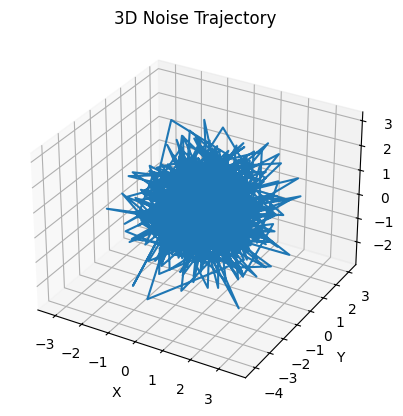

In [6]:
def generate_noise_trajectory(num_points):
    """
    Generate a 3D noise trajectory.

    Parameters:
    - num_points: Number of points in the trajectory.

    Returns:
    - Arrays for x, y, and z coordinates of the noise trajectory.
    """
    x = np.random.randn(num_points)
    y = np.random.randn(num_points)
    z = np.random.randn(num_points)
    return x, y, z

# Number of points in the trajectory
num_points = 1000

# Generate arrays for x, y, and z coordinates of the noise trajectory
x, y, z = generate_noise_trajectory(num_points)

# Plot the 3D noise trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Noise Trajectory')

plt.show()

x_noise = []
y_noise = []
plane_height = 0.1


for i in range(len(z) -1):
    if z[i] < plane_height and z[i+1] > plane_height:
        x_noise.append((x[i]))
        y_noise.append((y[i]))
    else:
        pass



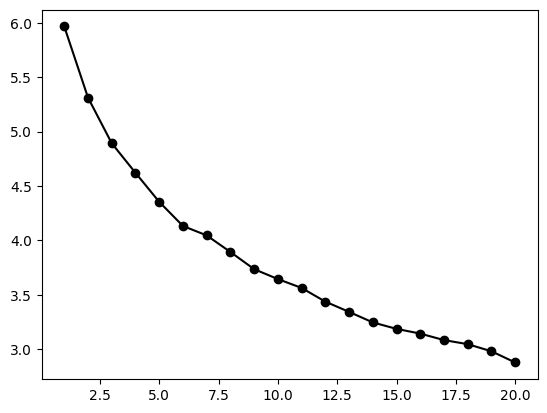

In [8]:
lk_noise = []
for k in range(1, len(K) + 1):
    lk_noise.append(lk(x_noise, y_noise, k))


plt.plot(K, np.log(lk_noise), marker = 'o', linestyle = '-', color = 'black')
plt.show()

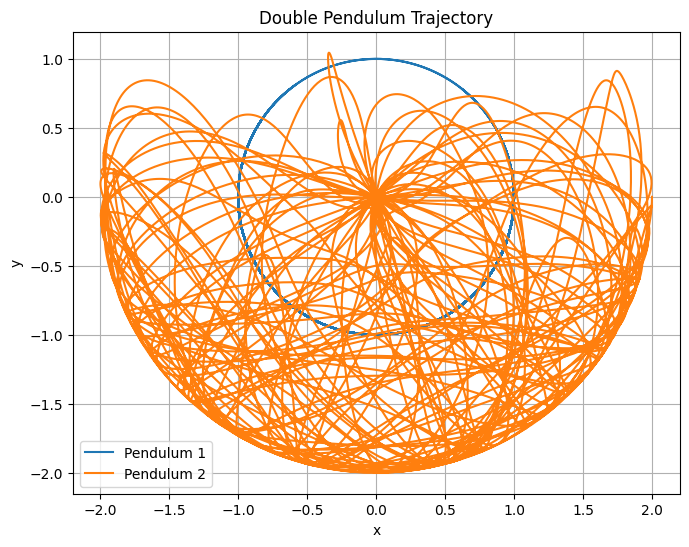

[-0.012265070049317614, -0.03973843377787527, -0.08291134986644633, -0.17710143204404358, -0.21632729940172143, -0.4411527618644816, -0.6693746519953662, -0.858998475409255, -0.982213263903259, -1.2453982865165805, -1.472998244155602, -1.5625651150192001, -1.769328703138153, -1.9448139090199903, -1.9817663445134928, -1.9438395430174316, -1.8590176456637235, -1.7780328090588875, -1.6561568339463626, -1.525444118730181, -1.3228230469255338, -1.0838558727032526, -0.9817469103226257, -0.8147207764616746, -0.7499708572136412, -0.5124558640082821, -0.435050147070139, -0.2669236310055986, -0.19240626626406526, -0.13539352571719881, -0.12020879130513953, -0.11914207268251883, -0.14733332000892316, -0.16513062959556382, -0.18661807880332743, -0.2258359046712174, -0.3297089654235814, -0.4179319889313496, -0.6730758477976494, -0.8862925597627007, -0.9645674672354678, -1.1743313106495328, -1.2630092892553106, -1.3535306481808067, -1.6701709895327053, -1.9260498607391383, -1.9929412903979067, -1.94

In [22]:
def double_pendulum(t, y, L1, L2, m1, m2, g):
    """
    Define the equations of motion for a double pendulum.

    Parameters:
    - t: Time variable (not used here, as equations are time-independent)
    - y: Array containing the angular positions and velocities of the pendulum
    - L1, L2: Lengths of the pendulum rods
    - m1, m2: Masses of the pendulum bobs
    - g: Acceleration due to gravity

    Returns:
    - Array containing the derivatives of the angular positions and velocities
    """
    theta1, theta2, omega1, omega2 = y

    # Equations of motion
    dydt = [omega1,
            omega2,
            (-g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2 ** 2 * L2 + omega1 ** 2 * L1 * np.cos(theta1 - theta2))) / (L1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2))),
            (2 * np.sin(theta1 - theta2) * (omega1 ** 2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2 ** 2 * L2 * m2 * np.cos(theta1 - theta2))) / (L2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))]

    return dydt

# Parameters
L1 = 1.0  # Length of the first pendulum rod
L2 = 1.0  # Length of the second pendulum rod
m1 = 1.0  # Mass of the first pendulum bob
m2 = 1.0  # Mass of the second pendulum bob
g = 9.81  # Acceleration due to gravity

# Initial conditions (theta1, theta2, omega1, omega2)
y0 = [np.pi/2, np.pi/2, 0, 0]  # Start from a rest position

# Time array
t_span = (0, 100)  # Integration time span
t_eval = np.linspace(0, 100, 10000)  # Times at which to store the results

# Solve the differential equations
sol = solve_ivp(double_pendulum, t_span, y0, args=(L1, L2, m1, m2, g), t_eval=t_eval)

# Extract the results
theta1 = sol.y[0]
theta2 = sol.y[1]

# Calculate the Cartesian coordinates of the pendulum bobs
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Plot the trajectory of the double pendulum
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Pendulum 1')
plt.plot(x2, y2, label='Pendulum 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Double Pendulum Trajectory')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

y_pendule = []
for i in range(999):
    if x[i] > 0 and x[i+1] < 0:
        y_pendule.append(y2[i])
    else:
        pass

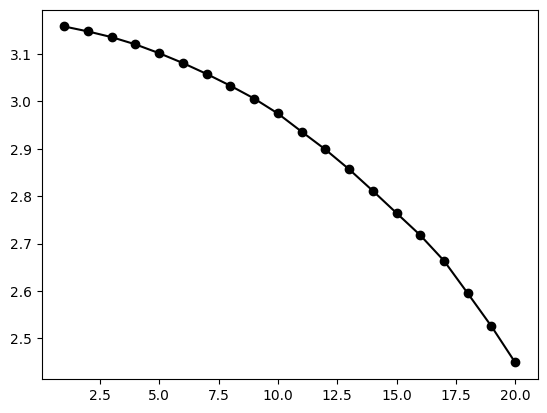

In [26]:
lk_pendule = []
x_pendule = [0] * len(y_pendule)

for k in range(1, len(K) + 1):
    lk_pendule.append(lk(x_pendule, y_pendule, k))


plt.plot(K, np.log(lk_pendule), marker = 'o', linestyle = '-', color = 'black')
plt.show()